## 9. 模型评估和性能考虑
### 9.1 模型评估

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
from sklearn.model_selection import TimeSeriesSplit

**生成交叉验证数据样本**

In [36]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit()
# 自动划分训练和测试集
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [0] TEST: [1]
TRAIN: [0 1] TEST: [2]
TRAIN: [0 1 2] TEST: [3]
TRAIN: [0 1 2 3] TEST: [4]
TRAIN: [0 1 2 3 4] TEST: [5]


**估计不确定性**

In [53]:
ar = np.array([1,0.7])  
ma = np.array([1]) 
AR_object = ArmaProcess(ar, ma)

# 蒙特卡洛试验重复1000次
estimate = np.zeros(1000)

def MonteCarlo():
    # 生成一个1000
    simulated_data = AR_object.generate_sample(nsample=1000)
    mod = ARMA(simulated_data, order=(1, 0))  
    res = mod.fit()
    return -1*res.params[1]

In [60]:
for i in range(1000):
    estimate[i] = MonteCarlo()

c:\users\skywater\pycharmprojects\personal\py39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


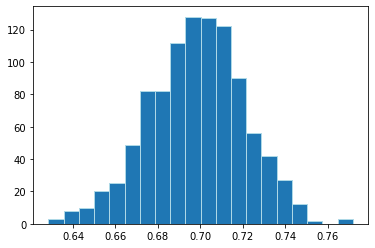

In [70]:
plt.hist(estimate,bins=20,edgecolor='lightblue');

In [74]:
ar = np.array([1,0.7, -0.2])  
ma = np.array([1]) 
AR_object = ArmaProcess(ar, ma)

# 蒙特卡洛试验重复1000次
estimate = np.zeros(1000)

def MonteCarlo():
    # 生成一个1000
    simulated_data = AR_object.generate_sample(nsample=1000)
    mod = ARMA(simulated_data, order=(1, 0))  
    res = mod.fit()
    return -1*res.params[1]

In [77]:
for i in range(1000):
    estimate[i] = MonteCarlo()

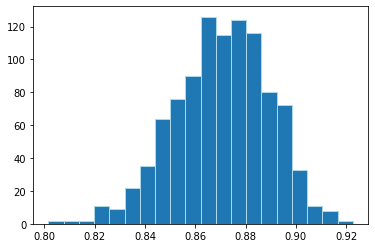

In [78]:
plt.hist(estimate,bins=20,edgecolor='lightblue');